# Principal Component Analysis and Unsupervised Learning

When working with high-dimensional data, it can be helpful to reduce the effective dimensionality of the data by reducing the number of features. For example, suppose we are synthesizing a crystalline material via epitaxy. After preparing a sample, we can measure several properties: reflectivity, conductance, brittleness, etc. After creating a bunch of samples, and measuring several properties for each sample, we want to analyze the relationship among the different features/properties in a systematic way.

If we denote a given experiment $i$ with the measurement vector $\mathbf{x}_i \in \mathbb{R}^{N_{feats}}$, then we can represent all of our experiments in a *design matrix* $X \in \mathbb{R}^{N_{data} \times N_{feats}}$, where $N_{data}$ denotes the number of samples or experiments, and $N_{feats}$ represents the number of measurements or features we record for each sample.

We know that several of our features are highly correlated across our experiments. Can we find a lower-dimensional representation of our dataset $X' \in \mathbb{R}^{N_{data} \times k}$, $k < N_{feats}$, that describes the majority of variation in our dataset?

In principle, reducing the dimensionality of a dataset requires finding an injective function that maps each set of measured features to some lower dimensional set of features,
$$
\mathbf{x}' = \mathbf{f}(\mathbf{x})
$$

If this function is linear in the features, $\mathbf{f}(\mathbf{x}) = C^T \mathbf{x}$, then this problem reduces to finding the coefficient matrix $C \in \mathbb R^{N_{feats} \times k}$. For this linear case, we can use Principal Component Analysis (PCA).

The basic idea of PCA is that the eigenvectors of a dataset's covariance matrix reveal dominant patterns within the dataset, and so by projecting the dataset onto a subset of these eigenvectors, we can find lower-dimensional representation of the data. PCA is optimal in the sense that the first $k$ principal components represent a unique $k$ dimensional representation of a dataset that captures the most variance in the original data. Because PCA is a linear transform (we project the data on a set of basis vectors), then if we project the original dataset onto the full set of $N_{feats}$ eigenvectors, we basically will have rotated our dataset in a high-dimensional vector space, without discarding any information. [More info about PCA here](http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf)

Mathematically, the steps of computing PCA are relatively simple. We center our data by the feature-wise mean vector, compute the covariance matrix, compute the eigenvectors, sort them in descending order of accompanying eigenvalue magnitude, and then stack the first $k$ eigenvectors to create the coefficient matrix
$$
X = X_r - \bar{X_r}
$$
$$
\Sigma = \dfrac{1}{N_{data}} X^T X
$$

$$
\mathbf{v}_i = \text{Sort}[\text{eig}(\Sigma)]_i        
$$
$$
C = \{\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k \}
$$
where $\text{eig}$ denotes the $i^{th}$ eigenvector of $\Sigma$. The coefficient matrix $C$ denotes the first $k$ eigenvectors stacked on top of each other, sorted in *decreasing* order of the magnitude of their associated eigenvalue. In this context, we call the eigenvalues the "singular values" of the original data matrix $X$, while the eigenvectors are the principal components. The central idea of PCA is that the first $k$ principal components (sorted in descending order of eigenvalue magnitude) represent the optimal variance-preserving $k$ dimensional approximation of the original dataset.

Our choice of $k \leq N_{feats}$ will depend on the properties of the dataset. In practice, we usually plot all of the eigenvalues in descending order of magnitude, and then look for a steep dropoff in their average magnitude---this indicates low dimensionality in the underlying dataset. Deciding the value of $k$ determines whether we favor a more concise and compressed representation, or a more accurate one; and various [heuristics exist](https://arxiv.org/abs/1305.5870) for determining the right threshold. After choosing $k$, we discard the remaining eigenvectors.

What's nice about PCA is that it generalizes well even to cases where $N_{feats} \gg N_{data}$. For example, if we are working with high-resolution images, each pixel is essentially a separate feature, and so $N_{feats} = 2048 \times 2048 \sim 10^6$.

PCA falls broadly under the category of unsupervised learning, which are machine learning techniques that seek to discover structure and patterns in complex data, without external information like annotations that guide the learning process. Instead, unsupervised learning techniques find alternative representations of datasets that satisfy certain desiderata. In the case of PCA, we find a representation of the data in which the first few discovered variables capture the majority of the dataset's variance, thus compressing meaningful properties of the dataset into a lower-dimensional representation.


### The von Karman vortex street

As an example dataset, we are going to use the velocity field created as a fluid flow passes over a cylinder. At low speeds or high fluid viscousities, the flow parts around the cylinder and then then smoothly rejoins behind it. However, as the speed or viscousity decreases, and instability appears in which the flow begins to oscillate behind the cylinder, giving rise to sets of counter-rotating vortices that break off the cylinder and pass into the wake. As speed further increases, this sequence of vortices becomes more chaotic, leading to irregular downstream structure.

The control parameter governing this transition from ordered to chaotic flow is the Reynolds number, a dimensionless parameter directly proportional to the speed, and inversely proportional to the viscousity. The Reynolds number arises from non-dimensionalizing the Navier-Stokes equations, and it measures the relative ratio of inertial forces to viscous forces in the system. In general, flows become more turbulent at higher Reynolds numbers.

In the class repository, we have included very large datasets corresponding to time series of snapshots showing the velocity field of the flow past a cylinder. We include separate datasets from several different Reynolds numbers, which show how the structure of the von Karman instability changes as the flow becomes more turbulent.

In order to better understand the structure of this unstable fluid flow, we are going to implement PCA, and apply it to these snapshots.

*For this example problem, you will need to download the [Von Karman Vortex Street Dataset](https://utexas.box.com/s/44f89zfy7v2k4g5wq4kv3vfvkm9w91wm) from Box. Place the downloaded files into the subdirectory `cphy/resources/von_karman_street/`. Alterntatively, you can manually edit the path we use below to import the dataset.*

### TO DO

+ Explore the included von Karman datasets using the code below. What symmetries are present in the data? Do any symmetries change as we increase the Reynolds number?
+ Implement Principal Component Analysis in Python. I have included my outline code below; we are going to use multiple inheritence in order to make our implementation compatible with standard conventions for machine learning in Python. You can use numpy's built-in eigensystem solvers `np.linalg.eig` and `np.linalg.eigh`
+ Plot the eigenvalues of the data covariance matrix in descending order. What does this tell us about the effective dimensionality, and thus optimal number of features, to use to represent the von Karman dataset?
+ Try re-running your analysis using datasets from different Reynolds numbers. How does the effective dimensionality of the problem change as Reynolds number increases?
+ For this problem, the principal components often appear in pairs. Can you think of a reason for this?
+ What happens if we don't subtract the feature-wise mean before calculating PCA?
+ In Fourier analysis, we project a function onto linear combination of trigonometric basis functions. How is this related to principal component analysis?

### Fun Facts

+ The flow field we are studying was simulated using [Lattice Boltzmann methods](http://www.scholarpedia.org/article/Lattice_Boltzmann_Method). In the next part of the course, we will learn how to numerically solve partial differential equations such as the Navier-Stokes equations that govern fluid flows. Lattice Boltzmann methods are distinct from the solvers we will use, however, because they involve simulating individual particles rather than a governing equation. LBM have significant similarity to the cellular automata we implemented previously
+ We are applying PCA to sequences of velocity fields from a fluid flow, but this method can be applied to images, graphs, and almost any high-dimensional dataset. All that really matters is that you can take your data, and apply some sort of invertible transformation so that it becomes a big matrix of shape $(N_{samples}, N_{features})$
+ What about the more general problem of finding new features are that nonlinear functions of our observed features? One option would be to transform the data with fixed nonlinear functions that capture important features, such as trigonometric functions or spatially-localized kernels, and then apply the PCA calculation in this "lifted" space. This approach is the basis of kernel-PCA. Even more general approaches are the subject of current research in nonlinear embedding techniques, such as [UMAP and tSNE](https://pair-code.github.io/understanding-umap/).

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Implement principal component analysis


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

# We are going to use class inheritance to define our object. The two base classes from
# scikit-learn represent placeholder objects for working with datasets. They include 
# many generic methods, like fetching parameters, getting the data shape, etc.
# 
# By inheriting from these classes, we ensure that our object will have access to these
# functions, even though we don't have to define them ourselves
class PrincipalComponents(BaseEstimator, TransformerMixin):
    """
    A class for performing principal component analysis on a dataset.
    """

    def __init__(self, random_state=None):
        self.random_state = random_state
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        """
        Fit the PCA model to the data X. Store the eigenvectors in the attribute
        self.components_ and the eigenvalues in the attribute self.singular_values_

        NOTE: This method needs to return self in order to work properly with the
         scikit-learn base classes from which it inherits.

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be fit.
        
        Returns:
            self (PrincipalComponents): The fitted object.
        """

        n_samples = np.shape(X)[0]
        n_features = np.shape(X)[1]
        mean_list = np.array([np.mean(X[:, i]) for i in range(n_features)])
        X_0 = np.array([i - mean_list for i in X])
        sigma = (1/(n_samples*n_features))*np.matmul(X_0.T, X_0)
        eig_sys = np.linalg.eigh(sigma)
        sorted_index = np.argsort(eig_sys[0])[::-1]
        self.singular_values_ = eig_sys[0][sorted_index]
        self.components_ = eig_sys[1][sorted_index]
        return self

    def transform(self, X):
        """
        Transform the data X into the new basis using the PCA components.

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be transformed.

        Returns:
            X_new (np.ndarray): A 2D array of shape (n_samples, n_components) containing
                the transformed data. n_components <= n_features, depending on whether
                we truncated the eigensystem.
        """
        
        Xc = X - np.mean(X, axis=0)
        return Xc.dot(self.components_.T)
    
    def inverse_transform(self, X):
        """
        Transform from principal components space back to the original space

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_components) containing the
                data to be transformed. n_components <= n_features, depending on whether
                we truncated the eigensystem.

        Returns:
            X_new (np.ndarray): A 2D array of shape (n_samples, n_features) containing
                the transformed data.
        """
        return X.dot(self.components_) + np.mean(X, axis=0)

**Reynold's number = 1200**

In [19]:

Re = 1200 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"../resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

Velocity field data has shape: (3000, 256, 128, 2)


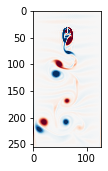

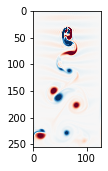

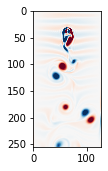

In [20]:
def plotter(i):
    # plt.close()
    
    fig = plt.figure(figsize=(5, 2.5))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
plotter(1)
plotter(1500)
plotter(2999)

>There appears to be no symmetry along x, y axes. However, the vortices occur in pairs and are connected to the cylinder and each-other by a smooth curve. The curve itself oscillates as a function of time

Text(0, 0.5, 'Eigenvalue rank')

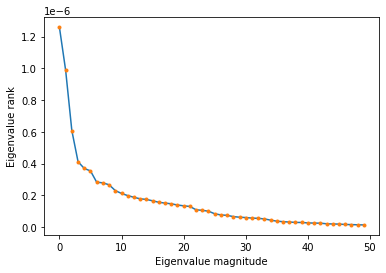

In [22]:
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')
plt.xlabel("Eigenvalue magnitude")
plt.ylabel("Eigenvalue rank")

>Effective dimensionality = 6

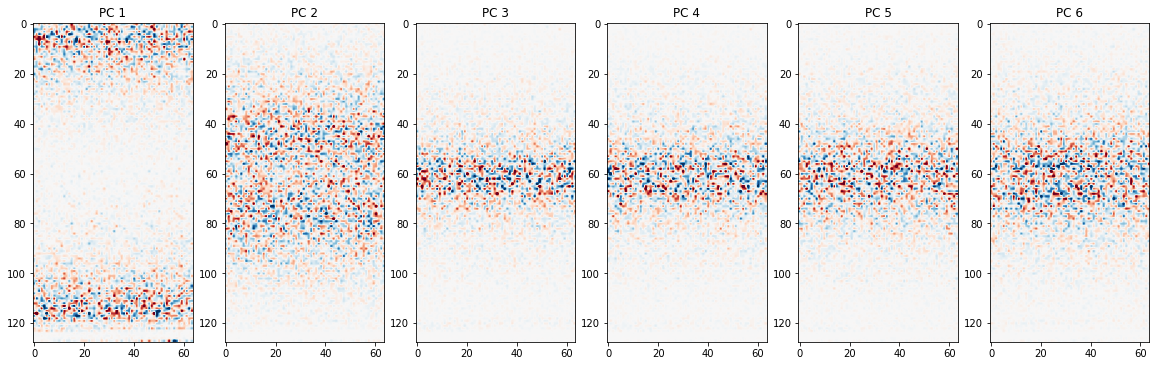

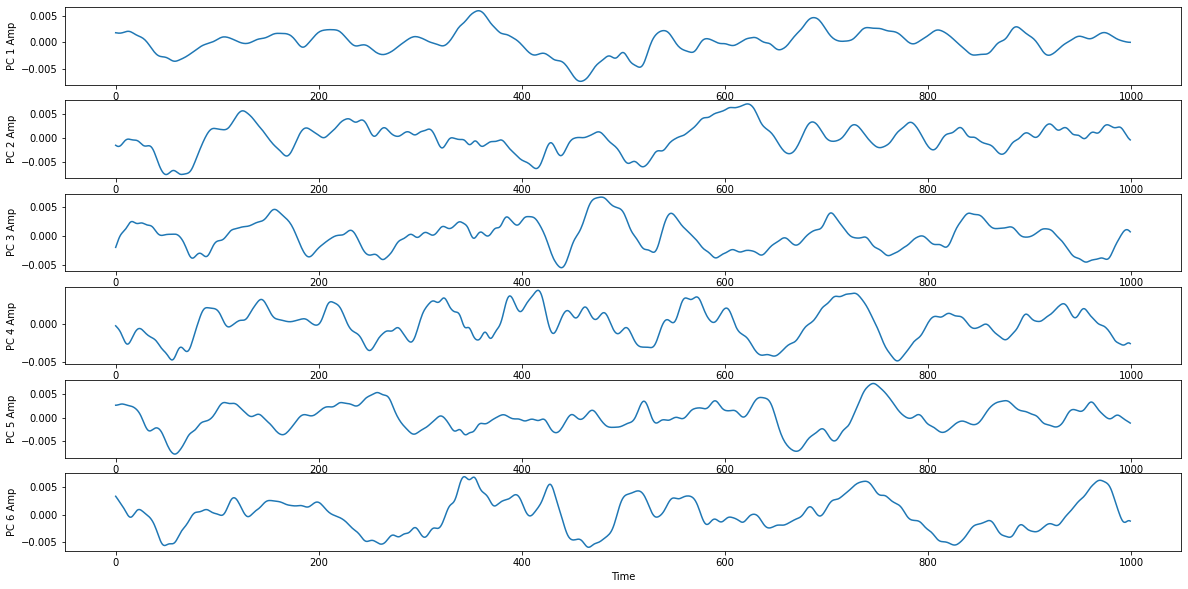

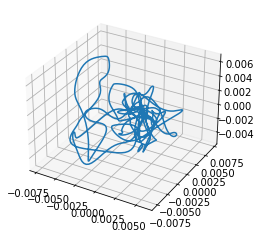

In [23]:
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(1, 6, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])

**Reynolds number = 900**

In [6]:

Re = 900 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"../resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

Velocity field data has shape: (3000, 256, 128, 2)


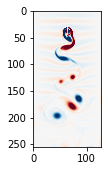

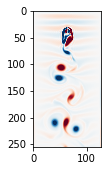

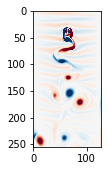

In [7]:
def plotter(i):
    # plt.close()
    
    fig = plt.figure(figsize=(5, 2.5))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
plotter(1)
plotter(1500)
plotter(2999)

/home/ram/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ram/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Eigenvalue rank')

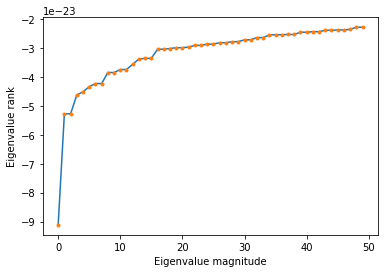

In [8]:
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')
plt.xlabel("Eigenvalue magnitude")
plt.ylabel("Eigenvalue rank")

>Effective dimensionality = 4

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])

**Reynolds number = 600**

In [36]:

Re = 600 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"../resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

Velocity field data has shape: (3000, 256, 128, 2)


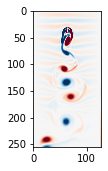

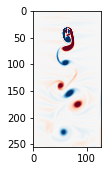

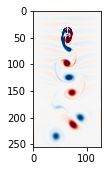

In [37]:
def plotter(i):
    # plt.close()
    
    fig = plt.figure(figsize=(5, 2.5))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
plotter(1)
plotter(1500)
plotter(2999)

Text(0, 0.5, 'Eigenvalue rank')

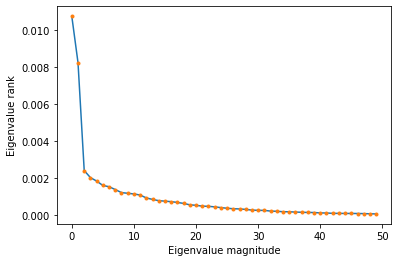

In [38]:
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')
plt.xlabel("Eigenvalue magnitude")
plt.ylabel("Eigenvalue rank")

>Effective dimensionality = 3

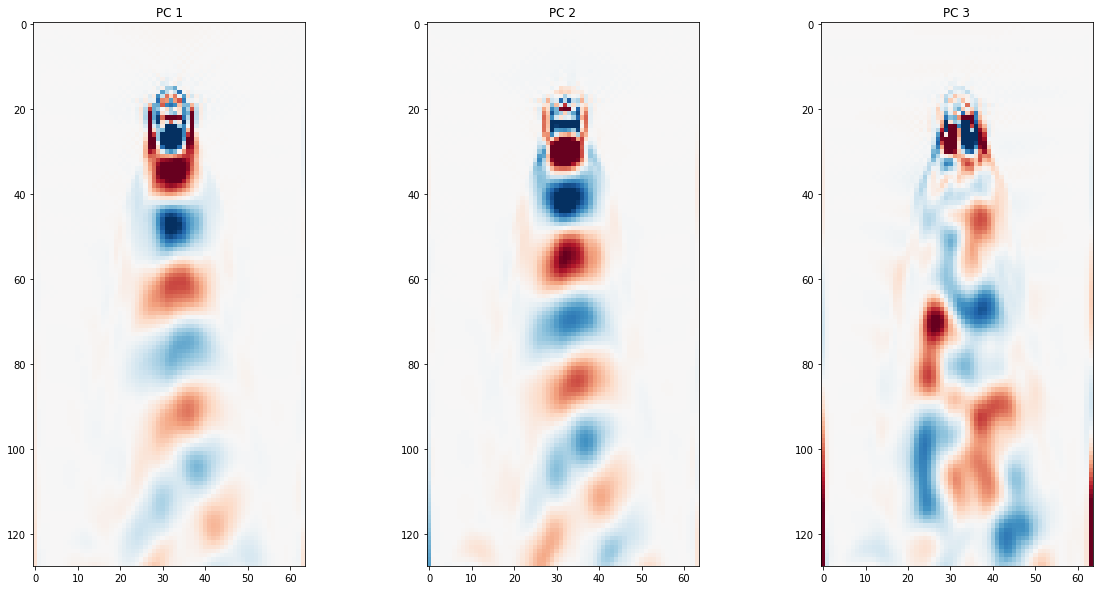

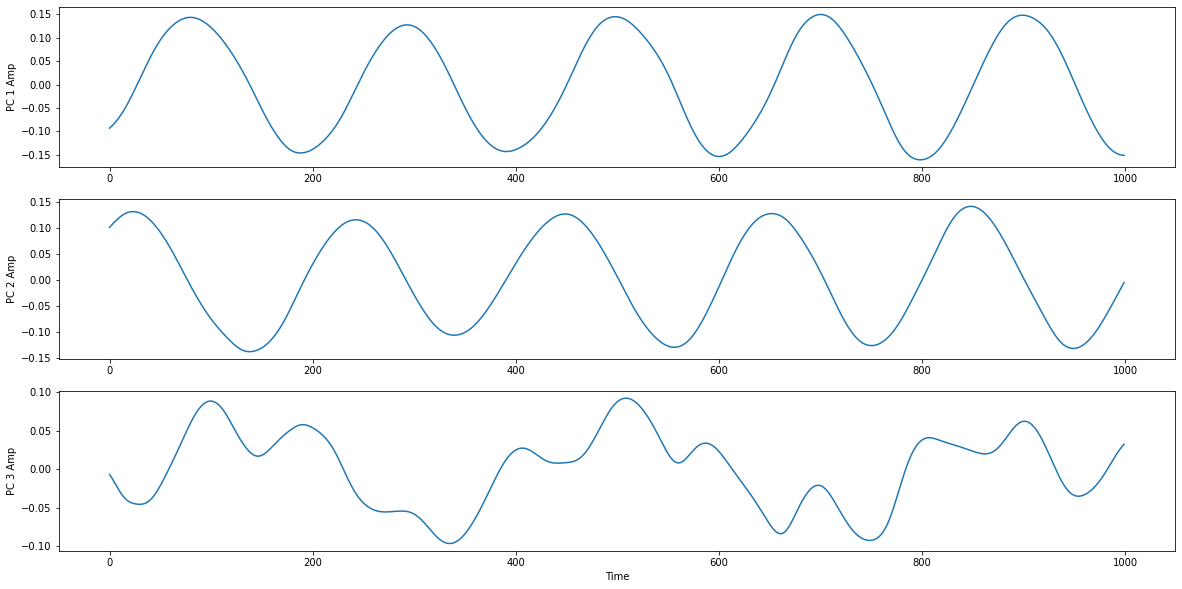

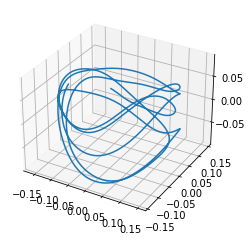

In [39]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])

**Details**
> The effective dimensionality increases as a function of the Reynolds number

> We will get the same answer, even if we do not eliminate the mean along each feature. Since PCA estimates the eigensystem of the covarinace matrix, for which, the eigenvalues are independent of linear transformations on X
